# Gagnaúrvinnsla
Gagnaúrvinnsla er mikilvægur hluti af starfi fjölmargra eðlisfræðinga, sérstaklega þeirra sem vinna við tilraunaeðlisfræði. Verkefni tengd gagnaúrvinnslu eru hins vegar fjölbreytt og því geta lausnir þeirra oft verið afar sértækar. Þó eru nokkrar tegundir af verkefnum sem birtast reglulega, óháð verksviðum eða starfsgreinum. Nokkur dæmi:  

* **Línuleg aðhvarfsgreining** (e. linear regression)
* Hreinsun og síun (e. filtering) á gögnum til þess að draga úr ómarktækum sveiflum
* **Ólínuleg aðhvarfsgreining** (e. non-linear regression)
* **Tímaraðagreining, leitni** (e. trend) og lotubundnar sveiflur
* Höfuðþáttagreining (e. principal component analysis)
* Sennileikamat (e. maximum likelihood estimate)

Það væri einfalt að undirbúa a.m.k. nokkra fyrirlestra fyrir hvert af dæmunum hér fyrir ofan. Mörg þessara atriða bregður stuttlega fyrir í stærðfræðinámskeiðum við Háskóla Íslands. Bæði línuleg aðhvarfsgreining og höfuðþáttagreining er kaflar í línulegri algebru og tölulegri greiningu. Sennileikamat bregður meðal annars fyrir í líkinda og tölfræði.

Í þessari IPython vinnubók munum við renna yfir nokkur dæmi sem kynna línulega aðhvarfsgreiningu (e. linear regression), ólínulega aðhvarfsgreiningu (e. non-linear regression) og grunnhugtök í tímaraðagreiningu.

**Í lok vinnubókarinnar má finna spurningar og verkefni sem hægt er að nota til þess að æfa skilning á námsefninu.**

# Kennsluefni
Það er til mikið af ágætist kennslubókum á netinu sem kenna gagnaúrvinnslu og tímaraðagreiningu með Python, `Numpy`, `Scipy` og `Matplotlib`. Hér fyrir neðan eru tenglar á nokkur dæmi:

*   [Numpy for beginners](https://numpy.org/doc/2.2/user/absolute_beginners.html)
*   [Time series analysis with Python](https://filippomb.github.io/python-time-series-handbook/notebooks/00/intro.html) (kaflar:*Introduction, Stationarity*)
*   [Introduction to Time Series Forecasting with Python](https://www.inf.szte.hu/~korosig/teach/books/Jason%20Brownlee%20-%20Introduction%20to%20Time%20Series%20Forecasting%20with%20Python%20-%20How%20to%20Prepare%20Data%20and%20Develop%20Models%20to%20Predict%20the%20Future-v1.9%20(2020).pdf)

`Pandas` er afar vinsælt Python forritasafn sem fólk notar við gagnaúrvinnslu og tímaraðagreiningu (sjá tengil fyrir neðan). Við sleppum því að skoða `Pandas` í þessu námskeiði en Kafli 15 í fyrirlestranótum Kristjáns Jónssonar fjallar stuttlega um þennan pakka:

https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html



# Numpy

Kafli 10 í Fyrirlestranótum Kristjáns Jónssonar fjalla ítarlega um `Numpy` pakkann (sjá tengil fyrir neðan):
[Tengill á Kafla 10](https://cs.hi.is/python/kafli10/)

Fyrir þau sem eru ryðguð getur verið gagnlegt að renna stuttlega yfir Kafla 10 núna.

`Numpy` gerir okkur kleift að vinna með vigra og fylki á ýmsa vegu. Margar fylkja- og vigraaðgerðir sem eru framkvæmdar í `Numpy` notast við hraðvirk föll sem eru byggð á C kóða. Fjölmörg kóðasöfn í eðlisfræði eru byggð á blöndu á `Numpy` skipunum. Dæmi: [Astropy](https://www.astropy.org/).



## Dæmi um sniðugar Numpy aðgerðir

Hér fyrir neðan eru nokkur dæmi um verkefni sem stundum bregður fyrir þegar unnið er með `Numpy`. Reyndur Python notandi ætti að hafa séð flest af þessu áður.


In [ ]:
import numpy as np

### 1. Finna það stak sem kemst næst ákveðnu gildi
Þú ert að vinna með einhvern vigur og vilt komast að því hvaða stak í vigrinum kemst næst tölu með ákveðið gildi.

In [ ]:
x = np.linspace(0, 1, 100)
xp = 0.573
idx = np.argmin(np.abs(x-xp))
print(f"Stak sem sem kemst næst {xp} er stakið {x[idx]:.4f}")

Stak sem sem kemst næst 0.573 er stakið 0.5758


### 2. Finna stök í vigri sem uppfylla Boolean skilyrði

Það getur verið gagnlegt að afmarka hluta gagna sem uppfylla ákveðin skilyrði. Þetta er oft gert með vigrum af Boole tagi (sjá dæmi fyrir neðan).



In [ ]:
arr = np.array([10, 20, 30, 40, 50])
idx = arr > 25  # Klippirammi (e. mask) af Boole tagi
print(arr[idx]) # [30 40 50]

[30 40 50]


### 3. Finna einstök gildi í vigri og fjölda tilfella

In [ ]:
arr = np.array([1, 2, 2, 3, 4, 4, 4, 5])
unique_vals, counts = np.unique(arr, return_counts=True)
print(unique_vals)  # [1 2 3 4 5]
print(counts)       # [1 2 1 3 1]

[1 2 3 4 5]
[1 2 1 3 1]


### 4. Finna gildi í vigri sem eru ekki núll

In [ ]:
arr = np.array([0, 2, 3, 0, 4])
idx = np.nonzero(arr)
print(idx[0])
print(arr[idx])

[1 2 4]
[2 3 4]


### 5. Búa til gögn sem fylgja Gauss-dreifingu (normaldreifingu)
Ath: Það er líka hægt að nota `Scipy` til þess að ná þessu fram

In [ ]:
# Af hverju skilgreinum við svokallað seed fyrir slembiúrtakið?
np.random.seed(3)

random_arr1 = np.random.rand(5)
random_arr2 = np.random.randn(5)

# Hver er munurinn á `np.random.rand` og `np.random.randn`?
print(random_arr1)
print(random_arr2)

[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695]
[-0.46004212 -0.05792084  2.07757414 -0.60131248  0.93923639]


### 6. Stafla saman vigrum
Ef við hugsum um tvívíð fylki þá er vertical stack að bæta við línu neðst í fylkið en horizontal stack að bæta við dálki

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

print('Vertical stack:')
print(np.shape(np.vstack((a, b))))
print(np.vstack((a, b)))  # Vertical stack

print('\n')
print('Horizontal stack:')
print(np.shape(np.hstack((a, b.T))))
print(np.hstack((a, b.T)))  # Horizontal stack

Vertical stack:
(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Horizontal stack:
(2, 3)
[[1 2 5]
 [3 4 6]]


### 7. Hlaupandi meðaltal

Hlaupandi meðaltal byggir á földun, `np.convolve`. Við erum með vigur af ákveðinni stærð en viljum nota hann til þess að búa til

In [ ]:
def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size)/window_size, mode='valid')

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(moving_average(arr, 3))  # [2. 3. 4. 5. 6. 7.]

[2. 3. 4. 5. 6. 7.]


# Línuleg aðhvarfsgreining

Öll hugtökin sem þarf til að skilja línulega aðhvarfsgreiningu má finna í línulegri algebru. Verkefnið snýst alltaf um það að finna stika fyrir línulegt fall sem er ætlað að lýsa gögnum. Reikningurinn byggir alfarið á fylkjamargfeldi óháð því hvort við séum að vinna með 1. stigs margliður eða eitthvað flóknara.

**ATH:** Það er mjög algengt að fólk rugli saman línulegri aðhvarfsgreining og ólínulegri aðhvarfsgreiningu sem felur oft í sér flóknari núllstöðvaleit sem byggir algrímum eins stigulsleit (e. gradient descent).  

Línuleg og ólínuleg aðhvarfsgreining byggir á aðferð minnstu fervika (e. least squares regression). Sjá umfjöllun í [Tölulegri greiningu](https://edbook.hi.is/stae405g/kafli03/#afer-minnstu-fervika)


### Um aðferð minnstu fervika
Látum $(x_1, y_1), (x_2, y_2), \dots (x_m, y_m)$  vera safn punkta í plani $x_j \in [a, b]$ fyrir öll $j$ og látum $f_1, \dots, f_n$ vera raungild föll á $[a, b]$. Við viljum finna fall af gerðinni:

$$
f(x) = \beta _1 f_1(x) + \beta _2 f_2(x) + \dots \beta_n f_n(x)
$$

með stuðla $\beta _1, \dots \beta _n$ þannig að punktarnir $(x_j, f(x_j))$ nálgi gefna punktasafnið sem best og þá er átt við ferningssummuna:

$$
\sum _{i=1} (y_i - f(x_i))^2
$$

## Fyrsta stigs margliður og 2. lögmál Newtons

Einfalt dæmi: Við viljum ntoa 1. stigs margliðu til þess að lýsa tengslum milli mældrar hröðunar og krafts sem verkar á einhvern massa. Þetta væri ágætis dæmi um tilraun sem við gerum í Verklegri Eðlisfræði á 1. ári.

Við vitum að jafnan sem lýsir þessu kerfi er einfaldlega:
$$
F = m a.
$$
Í dæminu fyrir neðan gera mælingar okkur kleift að áætla stærð stikans sem lýsir sambandinu milli krafts og hröðunar. Þessi stiki er massi hlutarins sem er notaður við mælingar.

Almennt getum við notað ritháttinn:

$h(x_i) = \beta_0 + \beta_1 x_i$

þar sem $\beta_0 $ og $\beta_1$ eru stikar þessara 1. stigs margliðu og $x_i$ eru inntaksbreytur (mælingar). í næsta hluta ætlum við að sjá hvað gerist ef við skoðum 2. stigs margliðu:

$h(x_i) = \beta_0 + \beta_1 x_i + \beta_1 x_i^2$

Áætlaður massi (hallatala): 4.92 kg
Skurðpunktur: 0.13 N (Ideally 0)
R^2 stuðull: 0.9965


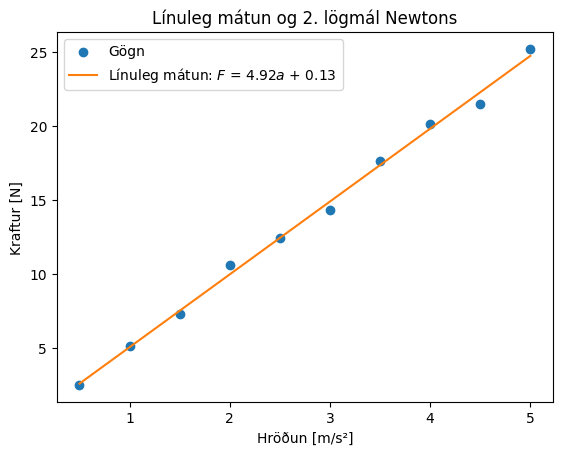

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Gervigögn (Kraftur [N] og hröðun [m/s²])
acceleration = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
force = np.array([2.5, 5.1, 7.3, 10.6, 12.4, 14.3, 17.6, 20.1, 21.5, 25.2])  # F = m*a with noise

# Mátun með línulegri aðhvarfsgreiningu
slope, intercept, r_value, p_value, std_err = linregress(acceleration, force)

# Niðurstaða mátunarinnar
force_pred = slope * acceleration + intercept

# Prentum hallatölu, skurðpunkt og R² stuðul á skjáinn
print(f"Áætlaður massi (hallatala): {slope:.2f} kg")
print(f"Skurðpunktur: {intercept:.2f} N (ætti að vera 0)")
print(f"R^2 stuðull: {r_value**2:.4f}")

# Teiknum graf
plt.scatter(acceleration, force, label='Gögn')
plt.plot(acceleration, force_pred, color='tab:orange', \
         label=f'Línuleg mátun: $F$ = {slope:.2f}$a$ + {intercept:.2f}')
plt.xlabel('Hröðun [m/s²]')
plt.ylabel('Kraftur [N]')
plt.title("Línuleg mátun og 2. lögmál Newtons")
plt.legend()
plt.show()

Það er gagnlegt að lesa sér aðeins til um virkni `Scipy` fallsins  `linregress`:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

## Annars stigs margliður
Nú ætlum við að lýsa kerfi með fallinu:
$h(x_i) = \beta_0 + \beta_1 x_i + \beta_2 x_i^2$
Hér eru þrír stikar sem við viljum máta við gögnin.

Mátaðar breytur: a=3.8196, b=3.2229, c=1.9647
Hittnifervik (e. mean square error): 0.8115


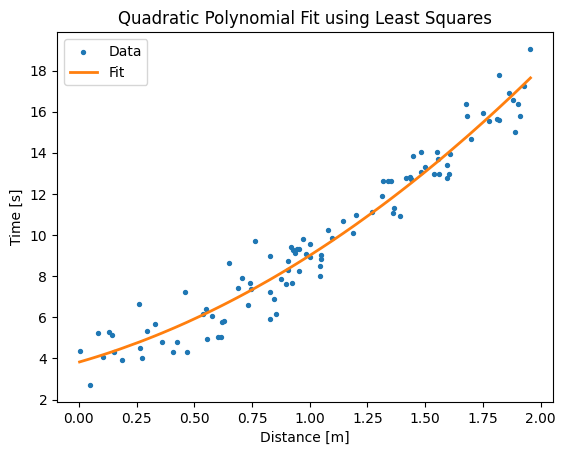

In [ ]:
from scipy.linalg import lstsq

np.random.seed(7)

# Gervigögn
X = 2 * np.random.rand(100)
Y = 4 + 3 * X + 2 * X**2 + np.random.randn(100)  # Quadratic equation with noise

# Fylkið sem lýsir 2. stigs margliðu: [1, X, X^2]
A = np.column_stack((np.ones_like(X), X, X**2))

# Finnum stika þessa línulega falls með lstsq fallinu
params, _, _, _ = lstsq(A, Y)

a, b, c = params

# Spágildi líkans
y_pred = a + b * X + c * X**2

# Reiknum meðalfervik
mse = np.mean((Y - y_pred) ** 2)

print(f"Mátaðar breytur: a={a:.4f}, b={b:.4f}, c={c:.4f}")
print(f"Hittnifervik (e. mean square error): {mse:.4f}")

# Röðum X og Y
X_sorted_indices = np.argsort(X)
X_sorted = X[X_sorted_indices]
y_pred_sorted = y_pred[X_sorted_indices]

# Teiknum graf
plt.scatter(X, Y, label='Data', s=8)
plt.plot(X_sorted, y_pred_sorted, color='tab:orange', linewidth=2, label='Fit')
plt.xlabel('Distance [m]')
plt.ylabel('Time [s]')
plt.title('Quadratic Polynomial Fit using Least Squares')
plt.legend()
plt.show()


## Flóknari föll

Niðurstaða línulegrar og ólínulegrar aðhvarfsgreiningar er fall sem við getum notað til þess að spá fyrir um úttaksbreytur (e. output variable) frá einni eða fleiri inntaksbreytum (e. input variable). Munurinn liggur í því hvernig frjálsar breytur (e. free variables) eða stikar fallana eru skilgreindar

Hvað gerist ef við ætlum að lýsa kerfi með fallinu:
$$h(x_i) = \beta_0 + \beta_1 \sin(x_i) + \beta_2 \cos(2x_i)$$
Hér eru við aftur með þrjá stika en fallið $h(x_i)$ er ekki margliða.


Mátaðar breytur: a=3.0261, b=1.9872, c=1.0521
Hittnifervik (e. mean square error): 0.0713


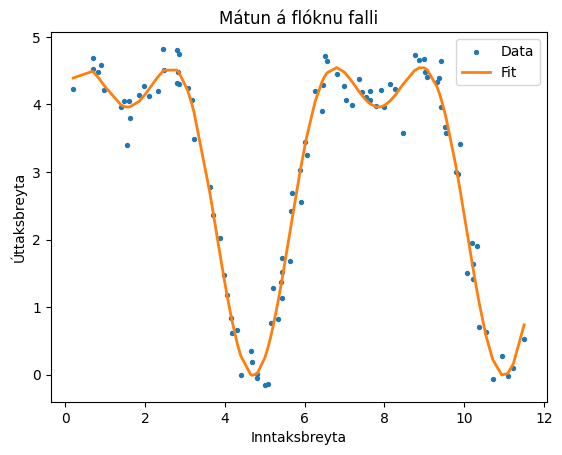

In [ ]:
# Framleiðum gervigögn
np.random.seed(1)

nsamples = 100
X = 2 * np.random.rand(nsamples) + np.linspace(0, 10, nsamples)
y = 3 + 2*np.sin(X) + np.cos(2*X) + 0.3 * np.random.randn(nsamples)  # Data with noise

# Setjum upp fylki sem lýsir líkaninu okkar: [1, sin(X), cos(2X)]
A = np.column_stack((np.ones_like(X), np.sin(X), np.cos(2*X)))

# Áætlum frjálsar breytur með aðferð minnstu fervika
params, _, _, _ = lstsq(A, y)

a, b, c = params

# Spágildi líkans
y_pred = a + b * np.sin(X) + c * np.cos(2*X)

# Reiknum meðalfervik
mse = np.mean((y - y_pred) ** 2)

print(f"Mátaðar breytur: a={a:.4f}, b={b:.4f}, c={c:.4f}")
print(f"Hittnifervik (e. mean square error): {mse:.4f}")

# Röðum X og Y áður en við teiknum graf
X_sorted_indices = np.argsort(X)
X_sorted = X[X_sorted_indices]
y_pred_sorted = y_pred[X_sorted_indices]

# Teiknum graf
plt.scatter(X, y, label='Data', s=8)
plt.plot(X_sorted, y_pred_sorted, color='tab:orange', linewidth=2, label='Fit')
plt.xlabel('Inntaksbreyta')
plt.ylabel('Úttaksbreyta')
plt.title('Mátun á flóknu falli')
plt.legend()
plt.show()

# Ólínuleg aðhvarfsgreining

Hvað gerist ef að við verðum að vinna með ólínuleg föll. Skoðum til dæmis eftirfarandi fall:

$$h(x_i) = \beta_0 + \beta_1 \sin(x_i) + \beta_2 \exp(\beta _3 x_i)$$

Hér erum við með fjóra stika og fall $h(x_i)$ sem breytist ekki línulega með öllum stikum (takið eftir $\beta _3$). Línuleg aðhvarfsgreining mun að öllum líkindum ekki ganga í þessu tilfelli.

Það getur verið góð æfing að renna yfir listann hér fyrir neðan og velta fyrir sér hver þessara falla bjóði upp á línulega aðhvarfsgreiningu:

*   $\beta_1 x^2 + \beta_2x$
*   $\beta_1 \log(x) + \sin(\beta_2x)$
*   $(\beta_1 + \beta_2x) / (\beta_3 + \beta_4x)$
*   $\beta_1\tan(\beta_2x)$
*   $\beta_1 + \beta_2 x^{3.2}$




### Dæmi um ólínulega jöfnu
Hér fyrir neðan er kóði sem notar `curve_fit` fallið úr `scipy.optimzie` pakkanum. Hver er munurinn á þessu falli og `lstsq` úr `scipy.linalg` ?

Fitted Parameters: a=0.0013498776572508351, b=2.1520021887405902, c=1.6336048635505558, d=0.28772928770465617
Mean Squared Error: 0.0701824895011153


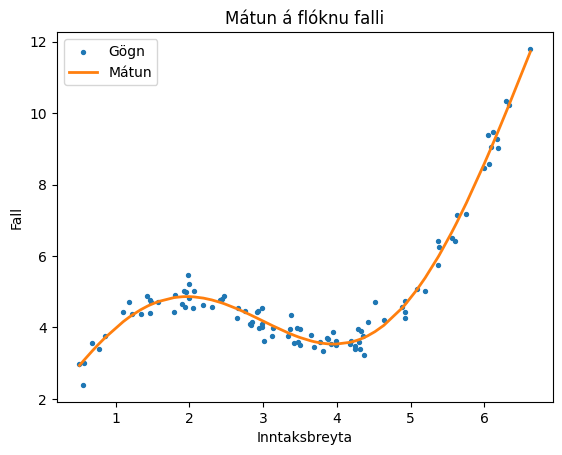

In [ ]:

from scipy.optimize import curve_fit
np.random.seed(3)

# Gervigögn
nsamples = 100
X = 2 * np.random.rand(nsamples) + np.linspace(0, 5, nsamples)
y = 1.0 + 2*np.sin(X) + np.exp(0.35*X) + 0.3 * np.random.randn(nsamples)

def nonlin_model(x, a, b, c, d):
    return a + b*np.sin(x) + c*np.exp(d*x)

# Mátum með ólínulegri aðhvarfsgreiningu
params, _ = curve_fit(nonlin_model, X, y)

a, b, c, d = params

# Reiknum spágildi líkans
y_pred = nonlin_model(X, a, b, c, d)

# Reiknum meðalfervik
mse = np.mean((y - y_pred) ** 2)

print(f"Fitted Parameters: a={a}, b={b}, c={c}, d={d}")
print(f"Mean Squared Error: {mse}")

# Röðum X og Y
X_sorted = np.sort(X)
y_pred_sorted = nonlin_model(X_sorted, a, b, c, d)

# Teiknum graf
plt.scatter(X, y, label='Gögn', s=8)
plt.plot(X_sorted, y_pred_sorted, color='tab:orange', linewidth=2, label='Mátun')
plt.xlabel('Inntaksbreyta')
plt.ylabel('Fall')
plt.title('Mátun á flóknu falli')
plt.legend()
plt.show()

**Athugið** að `Scipy` fallið `curve_fit` má einnig nota til þess að leysa verkefni í línulegri aðhvarfsgreiningu. Oft áttum okkur ekki á því hvað verkefni eru línuleg og hvaða verkefni eru ólínuleg í frjálsum breytum.

Prófið að leysa annars stigs margliðuna sem við sáum í kaflanum um línulega aðhvarfsgreiningu með `curve_fit` (sjá lausnina hér fyrir neðan).

**Spurn:** Hversu konar algrím notar `curve_fit` til þess að finna breyturnar sem lágmarka mismun falls og úttaksbreyta?




Fitted Parameters: a=3.757833641116437, b=3.3617515128151187, c=1.891596484983681
Mean Squared Error: 1.169493195925373


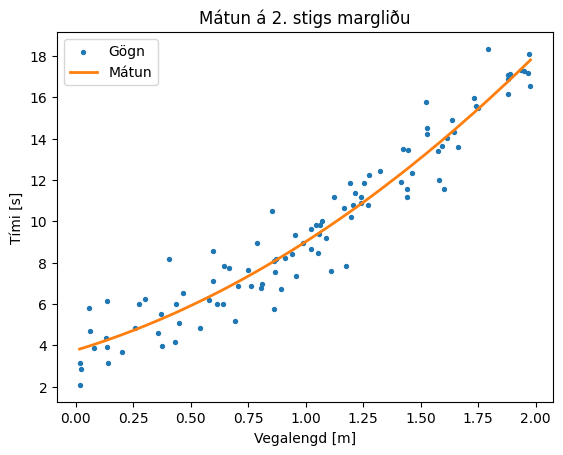

In [ ]:
# Generate synthetic data
np.random.seed(8)
X = 2 * np.random.rand(100)
Y = 4 + 3 * X + 2 * X**2 + np.random.randn(100)  # Quadratic equation with noise

def quadratic_model(x, a, b, c):
    return a + b*x + c*x**2

# Fit the polynomial model
params, _ = curve_fit(quadratic_model, X, Y)

a, b, c = params

# Generate predictions
y_pred = quadratic_model(X, a, b, c)

# Evaluate the model
mse = np.mean((Y - y_pred) ** 2)

print(f"Fitted Parameters: a={a}, b={b}, c={c}")
print(f"Mean Squared Error: {mse}")

# Sort X for smooth plotting
X_sorted = np.sort(X)
y_pred_sorted = quadratic_model(X_sorted, a, b, c)

# Visualizing the results
plt.scatter(X, Y, label='Gögn',s=8)
plt.plot(X_sorted, y_pred_sorted, color='tab:orange', linewidth=2, label='Mátun')
plt.xlabel('Vegalengd [m]')
plt.ylabel('Tími [s]')
plt.title('Mátun á 2. stigs margliðu')
plt.legend()
plt.show()

# Tímaraðagreining
Tímaröð er tvenndarruna: $(t_1, y_1), \dots (t_m, y_m)$

Henni má lýsa með tveimur vigrum af sömu lengd, annars vegar vigri sem táknar tíma, $\mathbf{t} = [t_1, \dots, t_m]$, oftast mældur með reglulegu millibili, og hins vegar vigri sem táknar einhvers konar mælingar, $\mathbf{y} = [y_1, \dots, y_m]$.

Dæmi: hitastig sem fall af tíma á einni af fjölmörgum veðurstöðvum sem eru reknar af Veðurstofu Íslands. Hitastig breytist með hverri mælingu. Mælingin hefur ákveðna óvissu og hugsanlega gæti leynst einhver mæliskekkja. Hvað er mælióvissa og hvað er mæliskekkja?

## Ath:

* Tímaröð er oft einhvers konar mælingar sem hefur verið raðað í tímaröð
* Tíðni mælinganna er oft föst fyrir alla tímaröðina en það þarf þó ekki að vera
* Oft má nota gögnin í tímaröðinni til að lýsa samfelldu falli einhvers konar eðlisfræðilegra eiginleika

Tímaraðagreining snýst of um að finna bestu mögulegu lýsingu á kerfinu sem mæligögnin lýsa. Það er ekki alltaf ljóst hvaða aðferð er besta til að greina gögnin. Það er því mikilvægt að skilja vel hvaða aðferðir eru til staðar og hvernig þær virka.

**ATH:** Við bendum þeim sem eru ryðguð í notkun Matplotlib á vinnubók sem má finna á Canvas síðu námskeiðisins undir *Matplotlib.py* eða *Matplotlib.ipynb*.

**ATH:** Kóðinn fyrir neðan er byggður á gagnlegum vinnubókum sem má finna hér:
 [Time series analysis with Python](https://filippomb.github.io/python-time-series-handbook/notebooks/00/intro.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.fft import fft

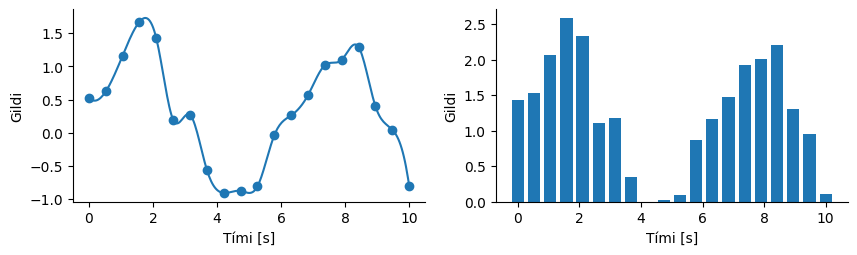

In [ ]:
# Búum til einfalda tímaröð
np.random.seed(0)

N = 20
t = np.linspace(0, 10, N)  # Tími
values = np.sin(t) + \
    np.random.normal(scale=0.3, size=len(t))  # Sínusbylgja með suði sem fylgir Gauss dreifingu

# Brúum þessi gögn með spline aðferð
spline_t = np.linspace(t.min(), t.max(), 300)  # Tímavigur
spline_values = make_interp_spline(t, values)(spline_t)  # Brúun

# Calculate bar values
bar_values = values - np.min(values)  # Use absolute values for the bar chart

# Búum til Figure og Axis hluti
fig, axes = plt.subplots(1, 2, figsize=(10, 2.5))

# Graf með upprunalegu tímaröðinni og brúun hennar
axes[0].plot(t, values, 'o', label='Gögn', color='tab:blue')
axes[0].plot(spline_t, spline_values, label='Brúun', color='tab:blue')
axes[0].set_xlabel("Tími [s]")
axes[0].set_ylabel("Gildi")

# Bar chart
axes[1].bar(t, bar_values, width=0.4, label='Absolute Value')
axes[1].set_xlabel("Tími [s]")
axes[1].set_ylabel("Gildi")

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

Það er ekkert sem segir að tíðni mælinga þurfi að vera fasti (sjá graf fyrir neðan). Ýmis raftæki eru með klukkur sem gera þeim kleift að framkvæma mælingar með reglulegi millibili. Hins vegar eru mælingar sem mannfólkið gerir oft frekar óreglulegar. Stundum þarf að nota brúun á mælipunktunum til þess að mynda tímaröð með fastri mælitíðni.

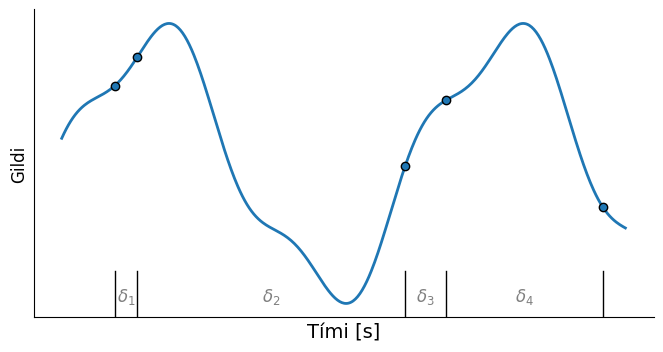

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)


# Búum til fallega tímaröð
t = np.linspace(0, 10, 500)  # Tími
y = np.sin(t) + 0.2 * np.cos(3 * t)  # Einfalt fall af tíma

# Veljum 5 stök í tímaröðinni af handahófi með hjálp np.random.choice
sample_indices = np.sort(np.random.choice(len(t), 5, replace=False))
t_sampled = t[sample_indices]  # Valdir tímapunktar
y_sampled = y[sample_indices]  # Valin gildi

# Reiknum tímalengd á milli punkta
deltas = np.diff(t_sampled)

# Búum til mynd
fig, ax = plt.subplots(figsize=(8, 4))

# Teiknum upp tímaröðina og valda punkta í röðinni
ax.plot(t, y, color="tab:blue", linewidth=2)
ax.scatter(t_sampled, y_sampled, color="tab:blue", edgecolors="black", zorder=3)

# Stillum grafið aðeins til
ax.set_ylabel("Gildi", fontsize=12)
ax.set_xlabel(r"Tími [s]", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Teiknum upp δ tímabilin
for i in range(len(deltas)):
    x_pos = (t_sampled[i] + t_sampled[i+1]) / 2  # Miðpunktur
    ax.annotate(r"$\delta_{" + str(i+1) + r"}$", (x_pos, -1.1), ha='center', fontsize=12, color='gray')

# Teiknum lóðrétt strik sem tákna tímabilin
for x in t_sampled:
    ax.axvline(x, ymin=-0.05, ymax=0.15, color='black', linewidth=1)

# Fínpúss
ax.set_xticks([])
ax.set_yticks([])

plt.show()

## Leitni
Leitni (eða þróun) lýsir almennri stefnu tímaraðarinnar. Dæmi: fjölgun erlendra ferðamanna á Íslandi þrátt fyrir árstíðabundnar sveiflur.
* Leitni getur verið vaxandi eða minnkandi en hún er alltaf einhalla.
* Hún getur aukist eða minnkað á mismunandi vegu yfir tíma (línulega, veldisvaxandi o.s.frv.).


Búum til þykjustutímaröð sem á að tákna fjöld farþega sem fara í gegnum Leifstöð á hverjum mánuði sem fall af tíma yfir 25 ára tímabil sem hefst árið 2000:


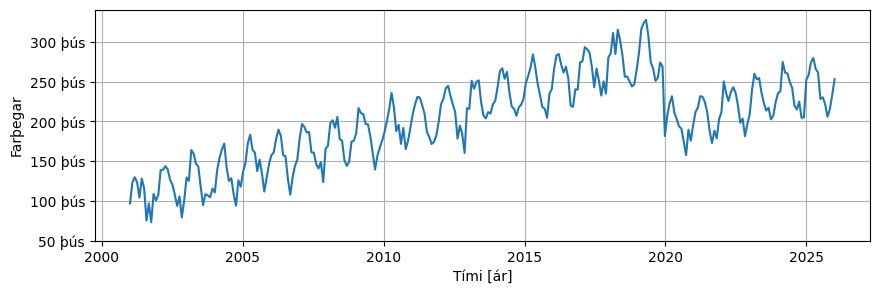

In [ ]:
# Setjum upp líkan sem býr til þykkjustugögn af fjöld farþega sem fara
# í gegnum Leifstöð á mánuði yfir 25 ára tímabil. Bætum svo við árstíðabundnum
# sveiflum, leitni, suði, og skyndilegum breytingum.
np.random.seed(6)

year0 = 2001
nyears = 25
nsteps = 12 * nyears
year = np.linspace(year0, year0 + nyears, nsteps)
A = 3e4
k = 1e5
N = 1e4
slope = 1e4
covid = 1e5
passenger_trend = k + slope * (year-year0)
noise = N * np.random.randn(nsteps)
fluctuations = A * np.sin(2*np.pi*year)
passengers = passenger_trend + fluctuations + noise

# Bætum við skyndilegri lækkun í tímaröðinni
covid_effect = -covid * np.ones(nsteps)
idx = np.argmin(np.abs(year - 2020))
covid_effect[:idx] = 0
passengers_wcovid = passengers + covid_effect

# Teiknum upp graf
figsize=(10, 3)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.plot(year, passengers_wcovid)
ax.set_xlabel("Tími [ár]")
ax.set_ylabel("Farþegar")
y1 = [5e4, 1.0e5, 1.5e5, 2.0e5, 2.5e5, 3e5]
y1_label = ['50 þús', '100 þús', '150 þús', '200 þús', '250 þús', '300 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()


Grafið að neðan sýnir leitni (e. trend) tímaraðarinn fyrstu ca. 20 árin, þ.e.a.s. áður en að fjöldi farþega hrinir skyndilega. Hér lýsum við leitni tímaraðarinnar með fyrsta stigs margliða (línu).

**ATH:** Það er ekkert sem segir að við fyrsta marglið passi best við gögnin. Kannski virkar fallið $f(x) = x^{1.2}$ betur.

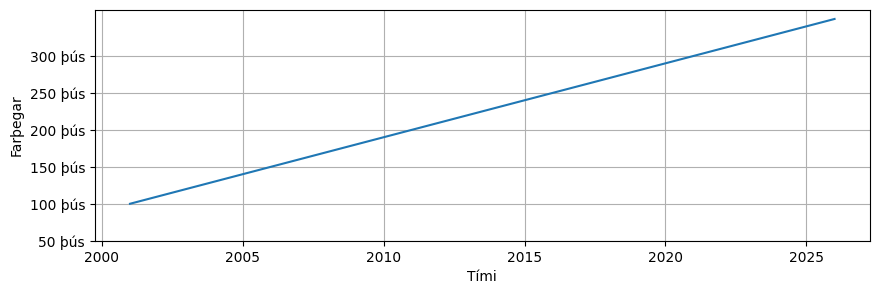

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.plot(year, passenger_trend)
ax.set_xlabel("Tími")
ax.set_ylabel("Farþegar")
y1 = [5e4, 1.0e5, 1.5e5, 2.0e5, 2.5e5, 3e5]
y1_label = ['50 þús', '100 þús', '150 þús', '200 þús', '250 þús', '300 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()

Í talnavísindum er oft talað um að fjarlægja leitni gagna (e. to detrend). Sú aðgerð vísar oftast í það að máta línu við gögnin og fjarlægja þá mátun frá tímaröðinni. Grafið fyrir neðan sýnir gögnin eftir að við höfum framkvæmt þá aðgerð.

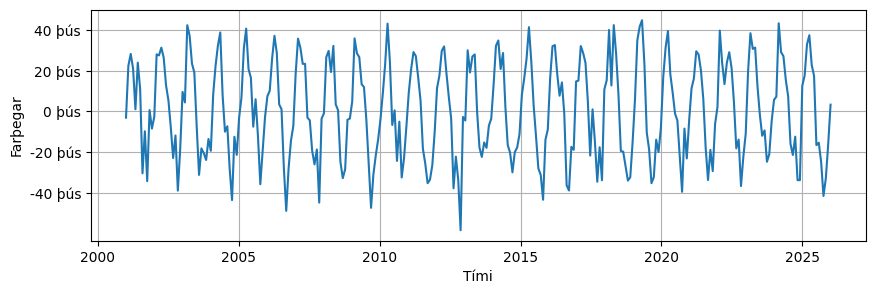

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
passengers_detrended = noise + fluctuations
plt.plot(year, passengers_detrended)
ax.set_xlabel("Tími")
ax.set_ylabel("Farþegar")
y1 = [-4e4, -2e4, 0, 2e4, 4e4]
y1_label = ['-40 þús', '-20 þús', '0 þús', '20 þús', '40 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()

Það getur verið gagnlegt að bera saman upprunalegu tímaröðina, leitnin og gögnin eftir að leitnin hefur verið fjarlægð.

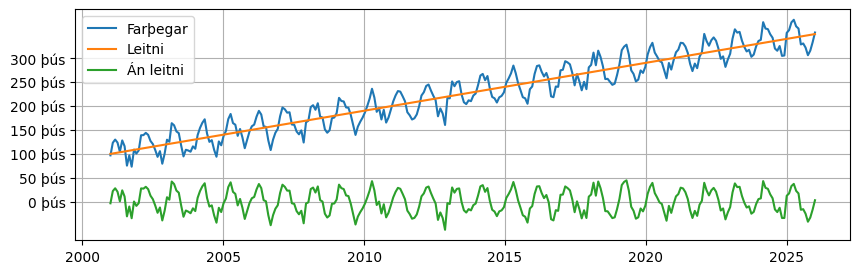

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.plot(year, passengers, label='Farþegar')
ax.plot(year, passenger_trend, label='Leitni')
ax.plot(year, passengers_detrended, label='Án leitni')
ax.grid()
ax.legend()

y1 = [0, 5e4, 1.0e5, 1.5e5, 2.0e5, 2.5e5, 3e5]
y1_label = ['0 þús', '50 þús', '100 þús', '150 þús',
            '200 þús', '250 þús', '300 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)

plt.show()

**Spurn:** Hvað getum við sagt um tímaröðina eftir að leitni hennar hefur verið fjarlægð?

Það er greinilega einhvers konar árstíðabundin sveifla í gögnunum. Sínusfallið fangar þessa sveiflu (sjá kóða fyrir neðan).

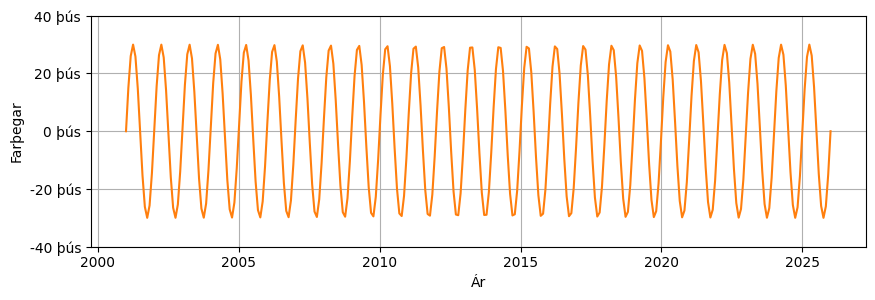

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(year, fluctuations, color='tab:orange')
ax.set_xlabel("Ár")
ax.set_ylabel("Farþegar")
y1 = [-4e4, -2e4, 0, 2e4, 4e4]
y1_label = ['-40 þús', '-20 þús', '0 þús', '20 þús', '40 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()

## Jafnvægi tímaraða
Jafnvægi (e. stationarity) tímaraðar lýsir því hvort að líkindadreifingin sem stjórnar tímaröðinni sé að breytast með tíma. Ef tímaröð er í jafnvægi yfir eitthvert tímabil er líkindadreifingin ekki að breytast.

### Hver eru einkenni jafnvægis?

Tímaröð er sögð vera í jafnvægi ef að það eru engar breytingar á kerfinu sem framkallar tímaröðina. Það eru til mismunandi jafnvægisskilyrði:
 * Sterk jafnvægiskilyrði
 * Veik jafnvægisskilyrði

**Ath:** Við gerum oft ráð fyrir stöðugleika þegar við vinnum með tímaraðir en hvernig prófum við jafnvægi?

### Sterk stöðugleikaskilyrði
Slembiferli $X(t) : t \in \mathcal{T}$ er sagt vera í jafnvægi ef, fyrir öll $t_1, t_2, \dots, t_n \in \mathcal{T}$ og $h$ þannig að $t_1 + h, t_2 + h, \dots, t_n + h \in \mathcal{T}$, gildir að  

$$
(X(t_1), X(t_2), \dots, X(t_n)) \overset{D}{=} (X(t_1+h), X(t_2+h), \dots, X(t_n+h))
$$

þar sem $\overset{D}{=}$ táknar að dreifingarnar eru jafnar.  

Með öðrum orðum helst sameiginleg dreifing hvaða safns mælinga sem er í ferlinu óbreytt óháð því hvenær þær eru teknar.  

Það er afar erfitt að sannreyna sterkt jafnvægi tímaraða, sérstaklega þegar aðeins er til takmarkað magn gagna.  

Af þessari ástæðu er veikur stöðugleiki oftast kannaður.


### Veik stöðugleikaskilyrði
Tímaröð $X$ uppfyllir veik stöðugleikaskilyrði ef:  

1. Meðaltal tímaraðarinnar er fast yfir tíma:  
   $$ E[X(t)] = m, \quad \forall t \in \mathcal{T} $$

2. Dreifnin er endanleg:  
   $$ E[X(t)^2] < \infty, \quad \forall t \in \mathcal{T} $$

3. Samdreifni (e. covariance) $X(t)$ og $X(t+h)$ ræðst aðeins af $h$, þ.e. er tímaskipt óbreytanlegt.  

Veik stöðuleikaskilyrði eru uppfyllt ef tímaröðin uppfyllir skilyrði um sterkan stöðugleika, en ekki öfugt.

### Dæmi um tímaröð sem uppfyllir veik stöðugleikaskilyrði

Hér fyrir neðan má sjá stutta skriftu sem býr til tímaröð þar sem úttakspunktar eru sóttir úr Gauss-dreifingu. Við getum áætlað meðaltal og staðalfrávik punktanna í tímaröðinni.

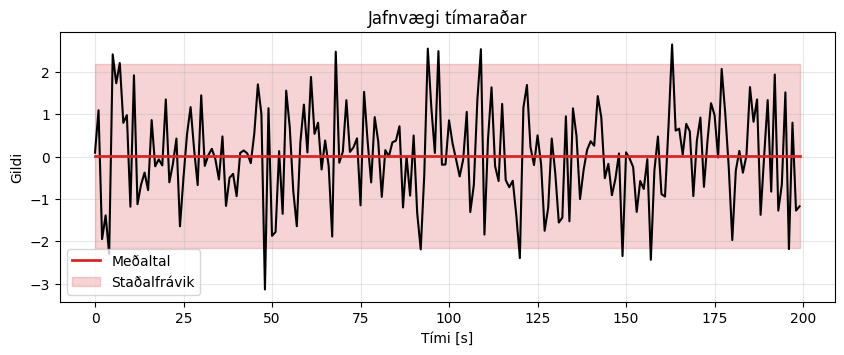

In [ ]:
np.random.seed(8)

time = np.arange(200)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

_, ax = plt.subplots(1,1, figsize=(10, 3.5))
ax.plot(time, stationary, 'k-')
ax.set_title("Jafnvægi tímaraðar")
ax.set_xlabel("Tími [s]")
ax.set_ylabel("Gildi")
ax.grid(alpha=0.3)

ax.plot(time, np.ones_like(time)*np.mean(stationary), linewidth=2, \
        color='tab:red', label='Meðaltal');

ax.fill_between(time, np.ones_like(time)*(stationary.mean()-1.96*stationary.std()),
                np.ones_like(time)*(stationary.mean()+1.96*stationary.std()), \
                color='tab:red', alpha=0.2, label='Staðalfrávik')
plt.legend()

Hvað gerist ef við brjótum tímaröðina í tvennt? Er einhver leið til þess að meta hvort að staðalfrávik tímaraðarinnar sé að breytast með tíma?

**NB:** Staðalefrávik (e. standard deviation) er oft bara kallað "RMS" á ensku. Samstarfsfélagar gætu t.d. spurt: "What the data RMS?"

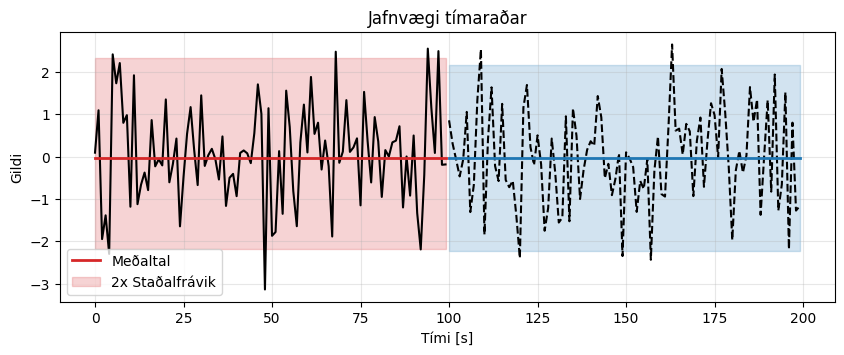

In [ ]:
np.random.seed(8)

time = np.arange(200)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

_, ax = plt.subplots(1,1, figsize=(10, 3.5))

idx = np.argmin(np.abs(time - 100))

time1 = time[:idx]
stationary1 = stationary[:idx]

time2 = time[idx:]
stationary2 = stationary[idx:]

ax.plot(time1, stationary1, 'k-')
ax.plot(time2, stationary2, 'k--')
ax.set_title("Jafnvægi tímaraðar")
ax.set_xlabel("Tími [s]")
ax.set_ylabel("Gildi")
ax.grid(alpha=0.3)

ax.plot(time1, np.ones_like(time1)*np.mean(stationary2), linewidth=2, \
        color='tab:red', label='Meðaltal');

ax.fill_between(time1,
                np.ones_like(time1)*(stationary1.mean()-2*stationary1.std()),
                np.ones_like(time1)*(stationary1.mean()+2*stationary1.std()), \
                color='tab:red', alpha=0.2, label='2x Staðalfrávik')

ax.plot(time2, np.ones_like(time2)*np.mean(stationary2), linewidth=2, \
        color='tab:blue', label='_Meðaltal');

ax.fill_between(time2,
                np.ones_like(time2)*(stationary2.mean()-2*stationary2.std()),
                np.ones_like(time2)*(stationary2.mean()+2*stationary2.std()), \
                color='tab:blue', alpha=0.2, label='_Staðalfrávik')

plt.legend()

## Sveiflur og hlaupandi meðaltöl

Hlaupandi meðaltal er algeng aðferð til þess að draga úr suði í tímaröð. Dæmið fyrir neðan sýnir hvað gerist þegar við beytum hlaupandi meðaltali á mælingar  á sínusbylgju sem einkennist af frekar miklu suði.

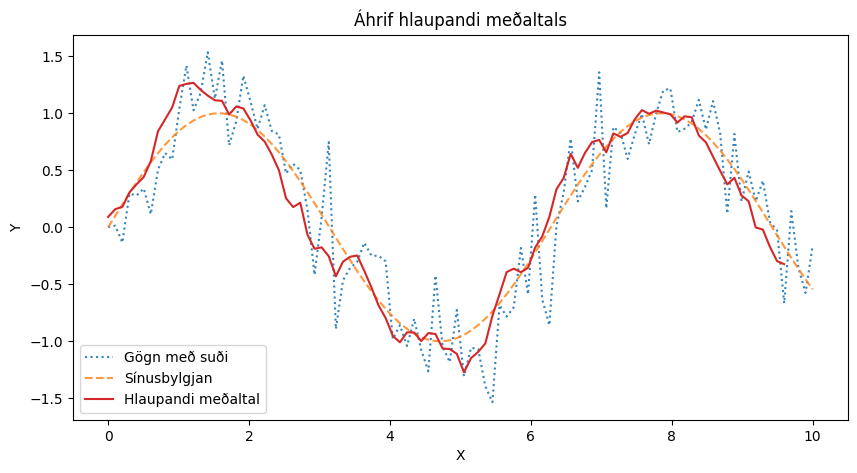

In [ ]:
np.random.seed(9)  # For reproducibility

# Gervigögn (sínusbylgja með suði)
x = np.linspace(0, 10, 100)
y_true = np.sin(x)  # Sínusbylgjan
noise = np.random.normal(0, 0.3, size=x.shape)  # Suð með Gauss-dreifingu
y_noisy = y_true + noise  # Merki með suði

# Skilgreinum fall sem býr til hlaupandi meðaltal
def moving_average(data, window_size):
    """Applies a simple moving average filter to the data."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Sléttum úr gögnunum með hlaupandi meðaltali
window_size = 5  # Stærð gluggans sem er notaður við að reikna hlaupandi meðalta
y_smooth = moving_average(y_noisy, window_size)

# Hlaupandi meðaltal byggir á földun, við þurfum því að stytta inntaksbreytuna
x_smooth = x[:len(y_smooth)]

# Teiknum upp graf
plt.figure(figsize=(10, 5))
plt.plot(x, y_noisy, label='Gögn með suði', linestyle='dotted', alpha=0.9)
plt.plot(x, y_true, label='Sínusbylgjan', linestyle='dashed', alpha=0.8)
plt.plot(x_smooth, y_smooth, label='Hlaupandi meðaltal', color='tab:red')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Áhrif hlaupandi meðaltals")
plt.show()

## Eiginfylgni

Eiginfylgnifallið (e. autocorrelation, ACF), $\rho (k)$, mælir fylgni tímaraðar, $X(t)$, við sín eigin töfðu gildi:

$$
\rho(k) = \frac{\sum_{t=k+1}^{N} (X(t) - \mu)(X(t-k) - \mu)}{\sum_{t=1}^{N} (X(t) - \mu)^2}
$$

þar sem:

- $k$ er töfin.
- $X(t)$ er gildi tímaraðarinnar á tíma $t$.
- $\mu$ er meðaltal tímaraðarinnar.

Gildi nálægt $1$ eða $-1$ benda til sterkrar fylgni, en gildi nærri $0$ benda til veikrar fylgni.

Athugið að það er hægt að skrifa eiginfylgnina sem
$$
ACF(k) = \frac{E[(X(t) - \mu]E[(X(t-k) - \mu]}{\sigma^2}
$$
þar sem $\sigma^2$ er dreifni (e. variance) tímaraðarinnar. Hér stendur $ACF$ fyrir autocorrelation function.

**ATH:** Eiginfylgni (e. autocorrelation) og eiginsamdreifni (e. autocovariance) eru ekki sami hluturinn.


<Figure size 800x400 with 0 Axes>

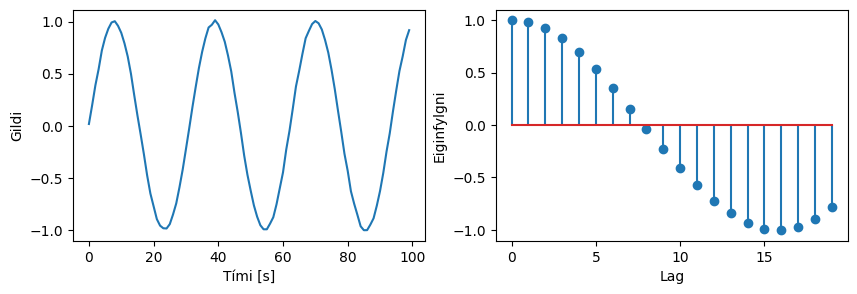

In [ ]:
# Gervigögn
np.random.seed(11)
n = 100  # Number of time points
time_series = np.sin(np.linspace(0, 20, n)) \
    + np.random.normal(0, 0.01, n)  # Sine wave with noise

# Fall sem reiknar eiginsamdreifni
def autocovariance(ts, lag):
    """Computes the autocovariance of a time series for a given lag."""
    ts_mean = np.mean(ts)
    n = len(ts)
    return np.sum((ts[:n-lag] - ts_mean) * (ts[lag:] - ts_mean)) / n

# Fall sem reiknar eiginfylgni
def autocorrelation(ts, lag):
    """Computes the autocorrelation for a given lag using np.cov."""
    ts1 = ts[:-lag] if lag > 0 else ts
    ts2 = ts[lag:] if lag > 0 else ts
    cov_matrix = np.cov(ts1, ts2, bias=True)
    return cov_matrix[0, 1] / cov_matrix[0, 0]  # Normalize by variance

# Reiknum eiginsamdreifni fyrir nokkur gildi á töf
lags = np.arange(20)  # Check lags from 0 to 19
autocov_values = [autocovariance(time_series, lag) for lag in lags]

# Reiknum eiginfylgni fyrir nokkur gildi á töf
lags = np.arange(0, 20)
autocorr_values = np.array([autocorrelation(time_series, lag) for lag in lags])

# Teiknum upp
plt.figure(figsize=(8, 4))
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].plot(time_series)

ax[0].set_xlabel("Tími [s]")
ax[0].set_ylabel("Gildi")

ax[1].stem(lags, autocorr_values)
ax[1].set_xlabel("Lag")
ax[1].set_ylabel("Eiginfylgni")

#plt.title("Eiginfylgni")
plt.show()

## Hvítt suð
í gagnaúrvinnslu og tímaraðagreiningu er oft talað um hvítt suð? Hvítt suð uppfyllir:

*   Meðaltal (e. mean) er núll
*   Staðalfrávikið er fasti
*   Eiginfylgnin er núll

Ef gröfin fyrir neðan eru skoðuð vandlega virðist sem staðalfrávikið sé að breytast með tíma í sumum tilfellum.


Text(0, 0.5, 'Gildi')

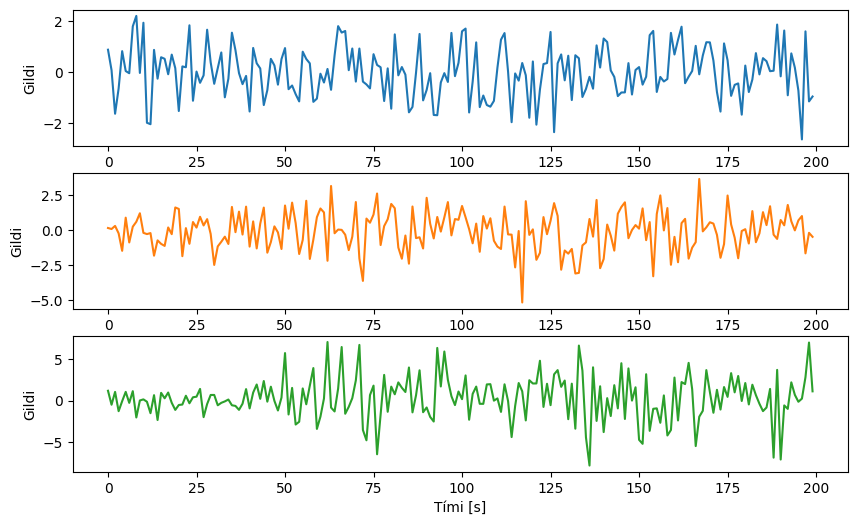

In [ ]:
nsteps = 200
time = np.arange(nsteps)

stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

maybe_non_white = np.hstack([np.random.normal(loc=0, scale=1.0, size=int(nsteps/4.)), \
                      np.random.normal(loc=0, scale=1.5, size=int(3.*nsteps/4.))])

non_white = np.hstack([np.random.normal(loc=0, scale=1.0, size=int(nsteps/4.)), \
                      np.random.normal(loc=0, scale=3.0, size=int(3.*nsteps/4.))])

fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].plot(time, stationary, color='tab:blue')
ax[1].plot(time, maybe_non_white, color='tab:orange')
ax[2].plot(time, non_white, color='tab:green')
ax[2].set_xlabel('Tími [s]')
ax[0].set_ylabel('Gildi')
ax[1].set_ylabel('Gildi')
ax[2].set_ylabel('Gildi')


# Spurning 1
Hver er munurinn á `scipy.linalg.lstsq` og `scipy.stats.linregress`?

# Spurning 2
Hver er munurinn á algríminu sem keyrir `scipy.linalg.lstsq` og `scipy.optimize.curve_fit`?

# Spurning 3
Nefnið dæmi um tímaröð sem uppfyllir veik stöðugleikaskilyrði

# Spurning 4
Af hverjum skilgreinum við fræ (e. seed) fyrir slembitölugjafann okkar með skipunum eins og `np.random.seed(42)`? Hvað gerist ef við sleppum því að skilgreina fræið?

# Spurning 5
Hvað gerir fallið `np.convolve`?

# Spurning 6
Hver er munurinn á eiginfylgni (e. autocorrelation) og eigindreifni (e. autocovariance)?

# Verkefni 0

Lesið í gegnum umfjöllun um aðferð minnstu fervika sem er rædd í tölulegri greiningu (sjá tengil fyrir neðan):

[Um aðferð minnstu fervika](https://edbook.hi.is/stae405g/kafli03/#afer-minnstu-fervika)

Setjið upp dæmið sem fjallaði um 2. lögmál Newtons en notið Numpy vigra og fylki til þess að leysa dæmið í stað þess að nota fallið `scipy.linalg.lstsq`

Til þess að leysa dæmið viljið þið eflaust nota fallið `numpy.linalg.inv`. Af hverju?


Áætlaður massi (hallatala): 4.92 kg
Skurðpunktur: 0.13 N (Ideally 0)
R^2 stuðull: 0.9965


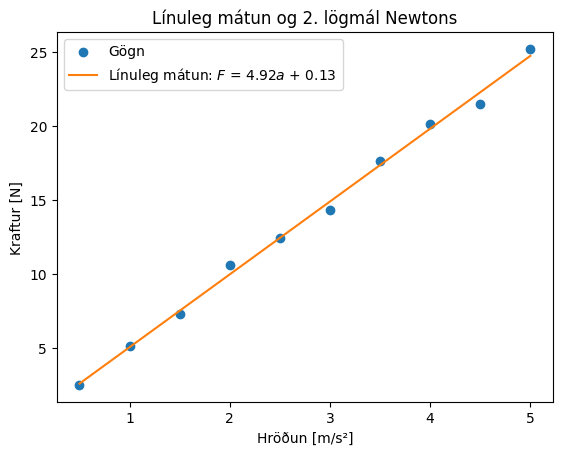

In [ ]:
from scipy.stats import linregress

# Gervigögn (Kraftur [N] og hröðun [m/s²])
acceleration = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
force = np.array([2.5, 5.1, 7.3, 10.6, 12.4, 14.3, 17.6, 20.1, 21.5, 25.2])  # F = m*a with noise

# Mátun með línulegri aðhvarfsgreiningu
slope, intercept, r_value, p_value, std_err = linregress(acceleration, force)

# Niðurstaða mátunarinnar
force_pred = slope * acceleration + intercept

# Prentum hallatölu, skurðpunkt og R² stuðul á skjáinn
print(f"Áætlaður massi (hallatala): {slope:.2f} kg")
print(f"Skurðpunktur: {intercept:.2f} N (Ideally 0)")
print(f"R^2 stuðull: {r_value**2:.4f}")

# Teiknum graf
plt.scatter(acceleration, force, label='Gögn')
plt.plot(acceleration, force_pred, color='tab:orange', \
         label=f'Línuleg mátun: $F$ = {slope:.2f}$a$ + {intercept:.2f}')
plt.xlabel('Hröðun [m/s²]')
plt.ylabel('Kraftur [N]')
plt.title("Línuleg mátun og 2. lögmál Newtons")
plt.legend()
plt.show()

Hvað gerum við nú? Umfjöllun um aðferð  minnstu ferviki segir að við viljum skrifa niður jöfnu á forminu:
$$
A c = b
$$
þar sem $A$ er fylki og $b$ og $c$ eru dálkvigrar. Nokkrar spurningar:

*   Hvað táknar $A$?
*   Hvað táknar $b$?
*   Hvað táknar $c$?

Aðferð minnstu fervika segir að við viljum lágmarka eftirfarandi stærð:
$$
\sum _{i=1}^m (y_i - b_i)^2 = || y - b ||^2 = || y - A c ||^2.
$$
Hvað táknar $y_i$?

Í kóðahólfinu hér fyrir neðan getið við unnið við að skrifa, $A$, $c$ og $y$ með breytunum sem eru skilgreindar í kóðahólfinu hér fyrir ofan.



In [ ]:
# Skilgreinum vigurinn y út frá stærðunum sem eru skilgreindar í dæminu fyrir ofan

# Skilgreinum fylkið A út frá stærðunum sem eru skilgreindar í dæminu fyrir ofan

# Skilgreinum vigurinn c út frá stærðunum sem eru skilgreindar í dæminu fyrir ofan

# Reiknið

# Verkefni 1

Skoðið þykjustutímaröðina sem sýnir fjölda farþega sem ferðast í gegnum leifstöð á hverjum mánuði. Notið línulega aðhvarfsgreiningu til þess að máta  eftirfarandi líkan við tímaröðina á tímabilinu frá 2020 til ársins 2025.

Byrjum á því að afrita kóðann sem bjó til upprunalega grafið (sjá skriftu fyrir neðan).

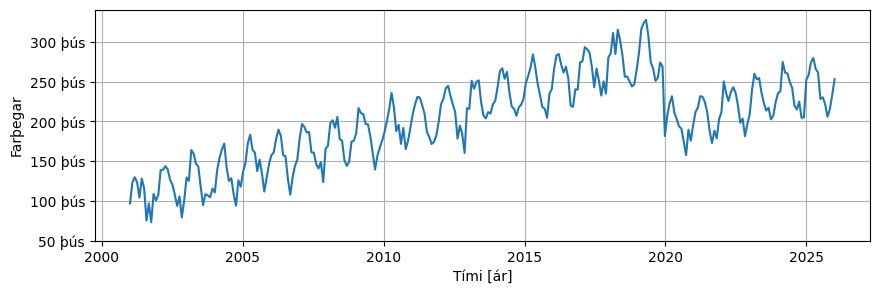

In [ ]:
# Setjum upp líkan sem býr til þykkjustugögn af fjöld farþega sem fara
# í gegnum Leifstöð á mánuði yfir 25 ára tímabil. Bætum svo við árstíðabundnum
# sveiflum, leitni, suði, og skyndilegum breytingum.
np.random.seed(6)

year0 = 2001
nyears = 25
nsteps = 12 * nyears
year = np.linspace(year0, year0 + nyears, nsteps)
A = 3e4
k = 1e5
N = 1e4
slope = 1e4
covid = 1e5
passenger_trend = k + slope * (year-year0)
noise = N * np.random.randn(nsteps)
fluctuations = A * np.sin(2*np.pi*year)
passengers = passenger_trend + fluctuations + noise

# Bætum við skyndilegri lækkun í tímaröðinni
covid_effect = -covid * np.ones(nsteps)
idx = np.argmin(np.abs(year - 2020))
covid_effect[:idx] = 0
passengers_wcovid = passengers + covid_effect

# Teiknum upp graf
figsize=(10, 3)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.plot(year, passengers_wcovid)
ax.set_xlabel("Tími [ár]")
ax.set_ylabel("Farþegar")
y1 = [5e4, 1.0e5, 1.5e5, 2.0e5, 2.5e5, 3e5]
y1_label = ['50 þús', '100 þús', '150 þús', '200 þús', '250 þús', '300 þús']
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()


Nú þurfum við að skera út þann hluta gagnanna sem svara til tímabilsins 2020-2025. Það gerum við með því að nota eitt a trikkunum sem er lýst í umfjölluninni um `Numpy` hér fyrir ofan.

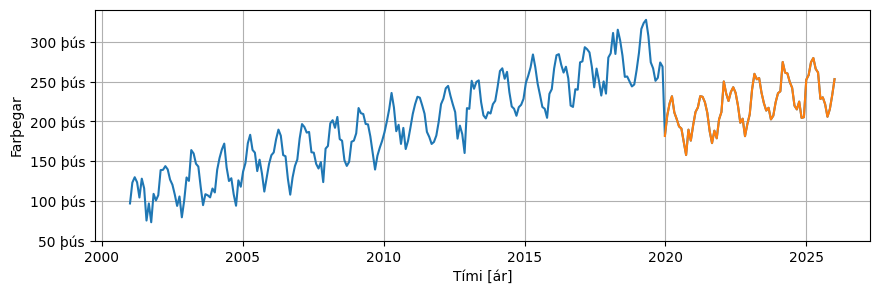

In [ ]:
idx = np.argmin(np.abs(year-2020))
passengers_2020 = passengers_wcovid[idx:]
year_2020 = year[idx:]

### Skrifið kóða sem notar línulega aðhvarfsgreiningu til að máta við þann hluta
### gagnanna sem eru teiknuð appelsínugul í grafinu fyrir neðan

### Teiknum upp graf
figsize=(10, 3)
fig, ax = plt.subplots(1, 1, figsize=figsize)
plt.plot(year, passengers_wcovid)
plt.plot(year_2020, passengers_2020, color='tab:orange')

ax.set_xlabel("Tími [ár]")
ax.set_ylabel("Farþegar")
ax.set_yticks(y1)
ax.set_yticklabels(y1_label)
plt.grid()
plt.show()

# Verkefni 2
Skriftan fyrir neðan sýnir tímaröð sem lýsir mælingum á sínusbylgju þar sem tímapunktarnir eru óreglulegir (það er ekki fast bil á milli punktum). Búið til nýja tímaröð með tímapunktum sem eru með reglulegu bili og teiknið brúaða tímaröð sem byggir á nýju tímapunktunum. Berið þessa tímaröð saman við sínusbylgjuna sem við erum að reyna að mæla (blá kúrva).

**Spurn:** Hvers konar brúun væri við hæfi í þessu tilfelli?

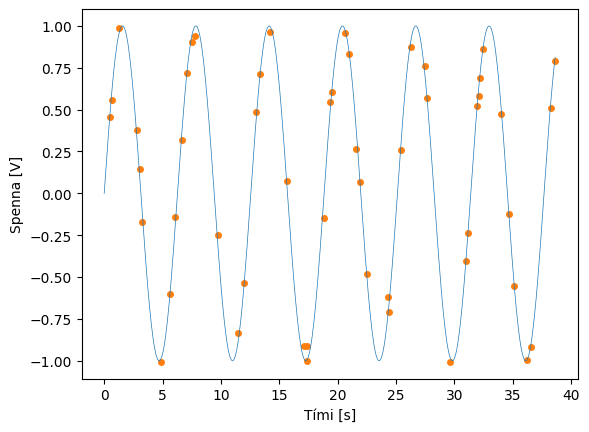

In [ ]:
N = 50
np.random.seed(42)
tsteps = np.abs(np.random.normal(loc=0., scale=1.0, size=N+1))
t_irreg = np.cumsum(tsteps)
t = np.linspace(0, np.max(t_irreg), 10*N)

error = np.random.normal(loc=0., scale=0.05, size=N+1)
series_irreg = np.sin(t_irreg) + error
series = np.sin(t)

plt.plot(t, series, lw=0.5)
plt.scatter(t_irreg, series_irreg, s=16, color='tab:orange')
plt.xlabel('Tími [s]')
plt.ylabel('Spenna [V]')
plt.show()


# Verkefni 3

Útgildi í mælingum má oft lýsa með Gauss-dreifinu, sbr. fallið hér fyrir neðan:
$$
f(x) = A e^{-x^2 / (2\sigma^2)},
$$
þar sem $A$ er hágildi fallsins og $\sigma$ lýsir breidd Gauss-dreifingarinnar.

Verkefnið ykkar er að máta fall af tegundinni
$$
g(x) = A_1 e^{-x^2 / (2\sigma_1^2)} + A_2 e^{-x^2 / (2\sigma_2^2)}
$$
við þykjustugögnin hér fyrir neðan.

**Spurn:** Hvernig er niðurstaða mátunarinnar háð bilinu þar sem mátunin er framkvæmd?


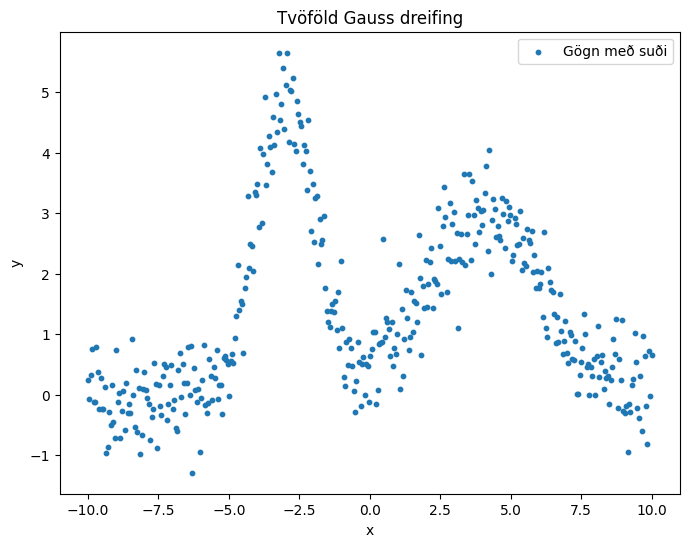

In [ ]:
np.random.seed(42)

def double_gaussian(x, a1, mu1, sigma1, a2, mu2, sigma2):
    """
    Returns the sum of two Gaussian functions.

    Parameters:
        x      : array-like, independent variable.
        a1     : amplitude of the first Gaussian.
        mu1    : mean (center) of the first Gaussian.
        sigma1 : standard deviation of the first Gaussian.
        a2     : amplitude of the second Gaussian.
        mu2    : mean (center) of the second Gaussian.
        sigma2 : standard deviation of the second Gaussian.

    Returns:
        The sum of two Gaussians evaluated at x.
    """
    gauss1 = a1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    gauss2 = a2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    return gauss1 + gauss2

# Inntaksbreytan
x = np.linspace(-10, 10, 400)

# Sannar breytur fyrir þessa tvöföldu Gauss-dreifingu: [a1, mu1, sigma1, a2, mu2, sigma2]
true_params = [5, -3, 1, 3, 4, 2]

# Bætum við smá suði
noise = np.random.normal(0, 0.5, x.shape)

true_params = [5, -3, 1, 3, 4, 2]
y_true = double_gaussian(x, *true_params)
y_noisy = y_true + noise

# Búum til graf
plt.figure(figsize=(8, 6))
plt.scatter(x, y_noisy, s=10, label='Gögn með suði')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tvöföld Gauss dreifing')
plt.legend()
plt.show()